<a href="https://colab.research.google.com/github/Tripthi0203/MiniProject_PCOS_Detection_DL/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import os 
import cv2
import seaborn as sn;sn.set(font_scale=1.4)
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.utils import shuffle 
from tqdm import tqdm 

In [ ]:
!unzip pcos_dataset.zip

Archive:  pcos_dataset.zip
   creating: pcos_dataset/
   creating: pcos_dataset/seg_test/
   creating: pcos_dataset/seg_test/no/
  inflating: pcos_dataset/seg_test/no/100.jpg  
  inflating: pcos_dataset/seg_test/no/101.jpg  
  inflating: pcos_dataset/seg_test/no/102.jpg  
  inflating: pcos_dataset/seg_test/no/103.jpg  
  inflating: pcos_dataset/seg_test/no/104.jpg  
  inflating: pcos_dataset/seg_test/no/105.jpg  
  inflating: pcos_dataset/seg_test/no/106.jpg  
  inflating: pcos_dataset/seg_test/no/107.jpg  
  inflating: pcos_dataset/seg_test/no/108.jpg  
  inflating: pcos_dataset/seg_test/no/109.jpg  
  inflating: pcos_dataset/seg_test/no/110.jpg  
  inflating: pcos_dataset/seg_test/no/111.jpg  
  inflating: pcos_dataset/seg_test/no/112.jpg  
  inflating: pcos_dataset/seg_test/no/113.jpg  
  inflating: pcos_dataset/seg_test/no/114.jpg  
  inflating: pcos_dataset/seg_test/no/115.jpg  
  inflating: pcos_dataset/seg_test/no/116.jpg  
  inflating: pcos_dataset/seg_test/no/117.jpg  
  infla

In [ ]:
class_names=['yes','no']
class_names_label={class_name:i for i,class_name in enumerate(class_names)}
nv_classes=len(class_names)
print(class_names_label)



IMAGE_SIZE=(150,150)


def load_data():
  DIRECTORY= "/content/pcos_dataset"
  CATEGORY=['seg_train','seg_test']
  output=[]
  for category in CATEGORY:
    path=os.path.join(DIRECTORY,category)
    images=[]
    labels=[]
    print("Loading {}".format(category))
    for folder in os.listdir(path):
      label=class_names_label[folder]
      for file in os.listdir(os.path.join(path,folder)):
        img_path = os.path.join(os.path.join(path,folder),file)
        image=cv2.imread(img_path)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,IMAGE_SIZE)
        images.append(image)
        labels.append(label)
    images=np.array(images,dtype='float32')
    labels=np.array(labels,dtype='int32')
    output.append((images,labels))
  return output
  #/content/pcos_dataset.zip


{'yes': 0, 'no': 1}


In [ ]:
(train_images, train_labels), (test_images, test_labels)= load_data()


Loading seg_train
Loading seg_test


In [ ]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=25)

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(2,activation=tf.nn.softmax)

])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=6,validation_split=0.2)

Epoch 1/6
12/12 [==============================] - 13s 161ms/step - loss: 169.3967 - accuracy: 0.6346 - val_loss: 8.3096 - val_accuracy: 0.8324
Epoch 2/6
12/12 [==============================] - 1s 73ms/step - loss: 2.7250 - accuracy: 0.8999 - val_loss: 0.0453 - val_accuracy: 0.9892
Epoch 3/6
12/12 [==============================] - 1s 72ms/step - loss: 0.0216 - accuracy: 0.9919 - val_loss: 0.0107 - val_accuracy: 0.9919
Epoch 4/6
12/12 [==============================] - 1s 72ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/6
12/12 [==============================] - 1s 73ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.9571e-04 - val_accuracy: 1.0000
Epoch 6/6
12/12 [==============================] - 1s 71ms/step - loss: 6.9723e-04 - accuracy: 1.0000 - val_loss: 2.3892e-04 - val_accuracy: 1.0000


In [ ]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221) 
    plt.plot(history.history['accuracy'], 'bo--', label ="acc") 
    plt.plot(history.history['val_accuracy'],"ro--", label = "val acc") 
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #Plot Loss function

    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label ="loss") 
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

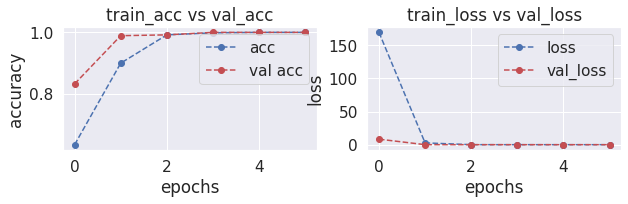

None


In [ ]:
print(plot_accuracy_loss(history))

In [ ]:
test_loss=model.evaluate(test_images,test_labels)

30/30 [==============================] - 1s 13ms/step - loss: 0.2494 - accuracy: 0.9467


In [ ]:
predictions=model.predict(test_images)
pred_labels=np.argmax(predictions,axis=1)

In [ ]:
print(classification_report(test_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       528
           1       0.99      0.89      0.94       429

    accuracy                           0.95       957
   macro avg       0.95      0.94      0.95       957
weighted avg       0.95      0.95      0.95       957



In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
def prediction(path):
  img=load_img(path,target_size=(150,150))
  i=img_to_array(img)
  img=np.expand_dims(img,axis=0)
  #print(model.predict(img))
  pred=np.argmax(model.predict(img))
  print(pred)
path='/content/101.jpg'
prediction(path)

1


VGG16 Model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input 
from keras.models import Model


In [ ]:
model=VGG16(weights='imagenet',include_top=False)
model=Model(inputs=model.inputs,outputs=model.layers[-5].output)
          

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(train_images) 
test_features=model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten
model2=VGG16(weights='imagenet', include_top=False)
input_shape=model2.layers[-4].get_input_shape_at(0) # get the input shope of desired Layer 
layer_input=Input (shape=(9, 9, 512)) # a new input tensor to be able to feed the desired layer # https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-Layer-and-get-final-output
x = layer_input
for layer in model2.layers[-4::1]:
  x=layer(x)
x=Conv2D(64, (3, 3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Flatten()(x)
x=Dense(100, activation='relu')(x)
x=Dense(2, activation='softmax')(x)
new_model=Model(layer_input, x)


In [ ]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=new_model.fit(train_features,train_labels,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 3s 146ms/step - loss: 5.7655 - accuracy: 0.5920 - val_loss: 1.8747 - val_accuracy: 0.6811
Epoch 2/10
12/12 [==============================] - 1s 70ms/step - loss: 1.6967 - accuracy: 0.7003 - val_loss: 6.4965 - val_accuracy: 0.6811
Epoch 3/10
12/12 [==============================] - 1s 68ms/step - loss: 3.0419 - accuracy: 0.7294 - val_loss: 12.2179 - val_accuracy: 0.3216
Epoch 4/10
12/12 [==============================] - 1s 69ms/step - loss: 8.2713 - accuracy: 0.6691 - val_loss: 1.6748 - val_accuracy: 0.6676
Epoch 5/10
12/12 [==============================] - 1s 68ms/step - loss: 1.6027 - accuracy: 0.5656 - val_loss: 1.5700 - val_accuracy: 0.6811
Epoch 6/10
12/12 [==============================] - 1s 67ms/step - loss: 1.5298 - accuracy: 0.7294 - val_loss: 1.4795 - val_accuracy: 0.6811
Epoch 7/10
12/12 [==============================] - 1s 72ms/step - loss: 1.5360 - accuracy: 0.7294 - val_loss: 1.3906 - val_accuracy: 0.6811
Epoch 8/10


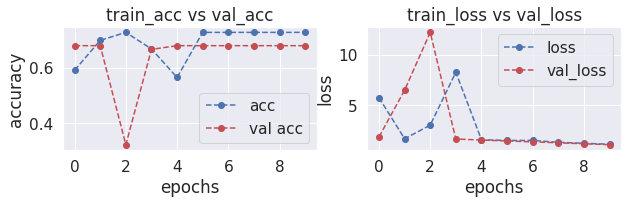

None


In [ ]:
print(plot_accuracy_loss(history))

In [ ]:
print(train_features)
print(test_features)

[[[[0.00000000e+00 0.00000000e+00 3.61934235e+02 ... 7.12206507e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 4.27243988e+02 ... 9.79041595e+01
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 3.67101624e+02 ... 6.25058784e+01
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 2.50310181e+02 6.14748901e+02 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 4.54042053e+02 1.69263382e+02 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 3.45345703e+02 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00

In [ ]:
test_loss2=new_model.evaluate(test_features,test_labels)

30/30 [==============================] - 1s 15ms/step - loss: 1.1350 - accuracy: 0.5517


In [ ]:
predictions2=new_model.predict(test_features)
pred_labels2=np.argmax(predictions2,axis=1)

In [ ]:
print(classification_report(test_labels,pred_labels2))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       528
           1       0.00      0.00      0.00       429

    accuracy                           0.55       957
   macro avg       0.28      0.50      0.36       957
weighted avg       0.30      0.55      0.39       957



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VGG19 Model

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input 
from keras.models import Model

In [ ]:
model=VGG19(weights='imagenet',include_top=False)
model=Model(inputs=model.inputs,outputs=model.layers[-5].output)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(train_images) 
test_features=model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten
model3=VGG19(weights='imagenet', include_top=False)
input_shape=model3.layers[-4].get_input_shape_at(0) # get the input shope of desired Layer 
layer_input=Input (shape=(9, 9, 512)) # a new input tensor to be able to feed the desired layer # https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-Layer-and-get-final-output
x = layer_input
for layer in model2.layers[-4::1]:
  x=layer(x)
x=Conv2D(64, (3, 3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Flatten()(x)
x=Dense(100, activation='relu')(x)
x=Dense(2, activation='softmax')(x)
new_model3=Model(layer_input, x)

In [ ]:
new_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=new_model3.fit(train_features,train_labels,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 2s 90ms/step - loss: 10.2562 - accuracy: 0.4939 - val_loss: 15.7695 - val_accuracy: 0.6811
Epoch 2/10
12/12 [==============================] - 1s 68ms/step - loss: 5.3990 - accuracy: 0.7037 - val_loss: 0.2848 - val_accuracy: 0.8676
Epoch 3/10
12/12 [==============================] - 1s 68ms/step - loss: 0.1962 - accuracy: 0.9438 - val_loss: 0.0319 - val_accuracy: 0.9946
Epoch 4/10
12/12 [==============================] - 1s 69ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 1s 69ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 4.8794e-04 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 1s 68ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 8.3340e-04 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 1s 68ms/step - loss: 2.3397e-04 - accuracy: 1.0000 - val_loss: 2.3610e-05 - val_accuracy: 1.

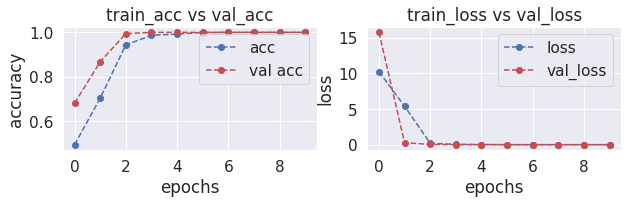

None


In [ ]:
print(plot_accuracy_loss(history))

In [ ]:
test_loss3=new_model3.evaluate(test_features,test_labels)

30/30 [==============================] - 0s 13ms/step - loss: 0.0145 - accuracy: 0.9927


In [ ]:
predictions3=new_model3.predict(test_features)
pred_labels3=np.argmax(predictions3,axis=1)

In [ ]:
print(classification_report(test_labels,pred_labels3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       528
           1       1.00      0.98      0.99       429

    accuracy                           0.99       957
   macro avg       0.99      0.99      0.99       957
weighted avg       0.99      0.99      0.99       957



In [ ]:
model.save("mini_project2.h5")